In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from tempfile import TemporaryFile
%matplotlib inline

In [3]:
data = np.load("/home/arc11/moving-mnist-train.npz")

In [8]:
for key in data.keys():
    print(key)

a = data['input_raw_data'][4, :, :, :]
b = np.zeros((3, 64, 64))
b[0, : , :] = a
b[1, : , :] = a
b[2, : , :] = a
print(np.max(b))



clips
dims
input_raw_data
0.99609375


In [5]:
print(np.arange(data['clips'].shape[1],dtype="int32"))

[   0    1    2 ... 9997 9998 9999]


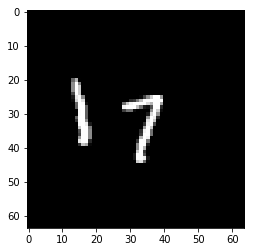

In [6]:
plt.imshow(data['input_raw_data'][4, 0, :, :], cmap='gray')

In [4]:
root = "/fs0/"
sport = "vollyball"

In [11]:
save_data = {}
filename = root+"vol.mp4"
vid = imageio.get_reader(filename,  'ffmpeg')
input_raw_data = np.zeros((60000,3, 88,160))
for num in range(60000):
    image = vid.get_data(num)
    reformatted_img = np.swapaxes(np.swapaxes(image, 2, 1), 1, 0)
    input_raw_data[num, :, :, :] = np.divide(reformatted_img, 255.0)
    if(num%1000 == 0):
        print(num)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000


In [12]:
dims = [[3, 88, 160]]
clips = np.zeros((2, 2000, 2))
for i in range(10, 2000):
    clips[0][i][0] = i*20
    clips[0][i][1] = 10
    clips[1][i][0] = i*20+10
    clips[1][i][1] = 10

np.savez(root+"train_"+sport+"_data_1.npz", input_raw_data=input_raw_data, clips=clips, dims=dims)

In [13]:
clips = np.zeros((2, 500, 2))
for i in range(500):
    clips[0][i][0] = i*20+2000
    clips[0][i][1] = 10
    clips[1][i][0] = i*20+10+2000
    clips[1][i][1] = 10
np.savez(root+"val_"+sport+"_data_1.npz", input_raw_data=input_raw_data, clips=clips, dims=dims)

In [14]:
clips= np.zeros((2, 499, 2))
for i in range(499):
    clips[0][i][0] = i*20+2500
    clips[0][i][1] = 10
    clips[1][i][0] = i*20+10+2500
    clips[1][i][1] = 10
np.savez(root+"test_"+sport+"_data_1.npz", input_raw_data=input_raw_data, clips=clips, dims=dims)


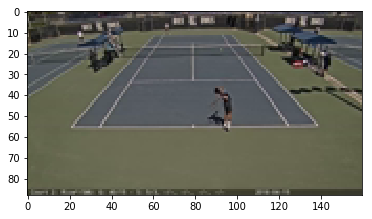

In [18]:
plt.imshow(np.swapaxes(np.swapaxes(input_raw_data[24010], 0, 1), 1, 2))